# Análisis de Egresos Hospitalarios

En este análisis se quiere ver la cantidad de egresos hospitalarios para diversos problemas
médicos, tanto cubiertos por GES y los no GES.

Las preguntas que se quieren responder con este análisis son:

- Cuántos casos del problema médico hubieron en cada año a nivel nacional?
- En qué región fué dónde hubo el mayor caso de estos problemas médicos?
- Cómo es la distribución etárea del problema médico?
- Cómo es la distribución por sexo del problema médico?
- Cómo es la distribución por tipo de previsión (FONASA e ISAPRE) del problema médico?
- Cómo es la distribución por sector público/privado del problema de salud?
- Cómo es la distribución por hospitales del problemad de salud?


Ahora, a nivel de Instituto Nacional del Tórax:

- Cuál es la cantidad de Egresos Hospitalarios del problema de salud en el Tórax? Cuánto es este 
porcentaje de la cantidad Nacional? Cómo se compara el porcentaje del Tórax con respecto a 
los otros Hospitales (Somos referencia?)
- Cuál es el grupo etáreo que mayoritariamente llega al Tórax?
- De cuántas procedencias llegan pacientes al Hospital del Tórax?


In [48]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares as aux
import funciones_auxiliares_hito_2 as aux2

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(aux2)
importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\finanzas\\Desktop\\Javier Rojas\\Javier\\trabajo\\SSMO\\EPH\\modulo_gestion\\1.analisis_problemas_de_salud\\egresos-hospitalarios\\funciones_auxiliares.py'>

In [2]:
dfs = aux.leer_anios_egresos()

c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:48: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:48: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:48: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', 

# Análisis de Variables Categóricas

En este apartado se quiere ver la distribución que tienen las variables categóricas de la base de
datos

Analizando todas las variables categoricas 

ID_PACIENTE
91F963B0790AA8D7FDBE02AB3B0CBFD7EA15BEC7    306
6BCD690647EA83E457F4AAFCD4047941A239176F    105
2057FF09EA8AFF1B92E5AAF19DEFC9FF80ACF289     99
8B0614F6FEFDDE092F7802BDF666E3D510A228D0     88
0BEDDE3D22D30D52077FDF9937CD714CC4B8640F     74
                                           ... 
6AC52E641A0FE51693A07E00FE39B3DCA6F677D9      1
3CEFDB73A7B1139E859288FFEBB3D4F9ECAC71BF      1
E56EE5AC18BC8E9136113570ECE30893A32D6C41      1
0A87C011FFF0307E0868B6F99A4135F2DF7C2245      1
602E989E30764335D157EA8409CB1F4122267DB6      1
Name: ID_PACIENTE, Length: 1250549, dtype: int64
--------------------------------------------------------------

GLOSA_ESTABLECIMIENTO_SALUD
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        46779
Clínica Dávila                                                          38799
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    35206
Hospital Dr. Hernán Henríquez Aravena (T

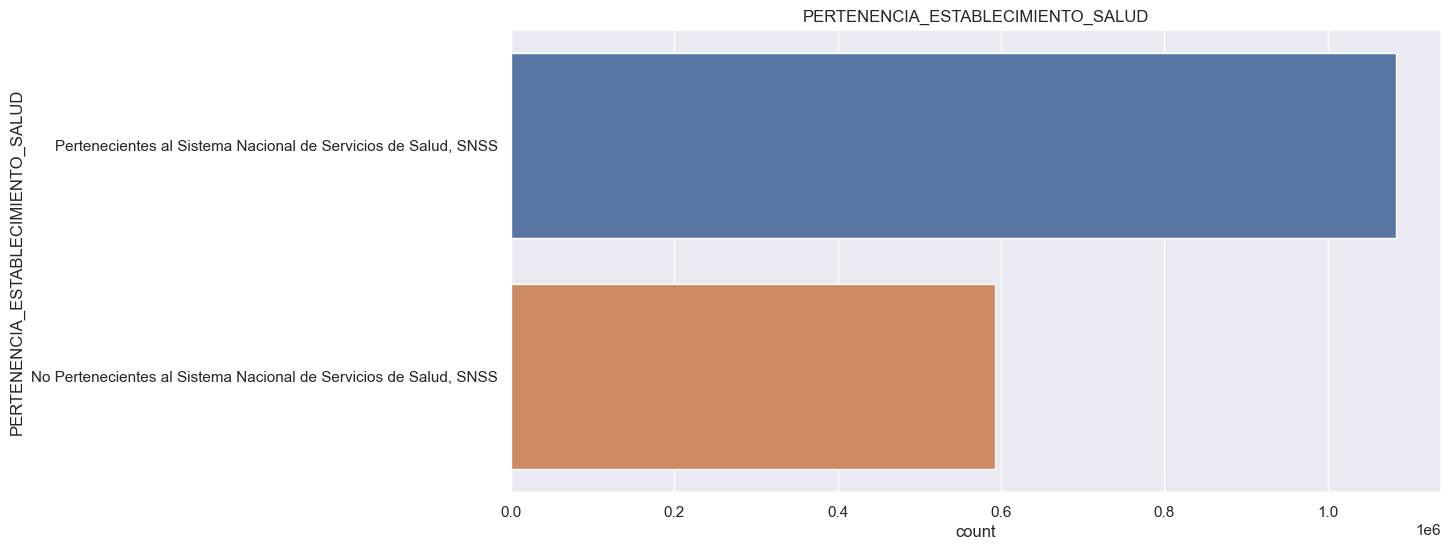

--------------------------------------------------------------

FECHA_NACIMIENTO
2009-05-30    337
2013-03-08    309
2013-01-30    301
2013-01-07    301
2013-01-09    299
             ... 
1915-04-20      1
1914-10-01      1
1918-01-05      1
1918-02-18      1
1917-03-23      1
Name: FECHA_NACIMIENTO, Length: 36364, dtype: int64
--------------------------------------------------------------

GLOSA_PAIS_ORIGEN
Chile                                1650058
Macao                                   5827
Perú                                    2247
Bolivia (Estado Plurinacional de)       1846
Argentina                                873
                                      ...   
Bahrein                                    1
Croacia                                    1
Moldova (República de)                     1
Santa Lucía                                1
Kiribati                                   1
Name: GLOSA_PAIS_ORIGEN, Length: 124, dtype: int64
-----------------------------------------

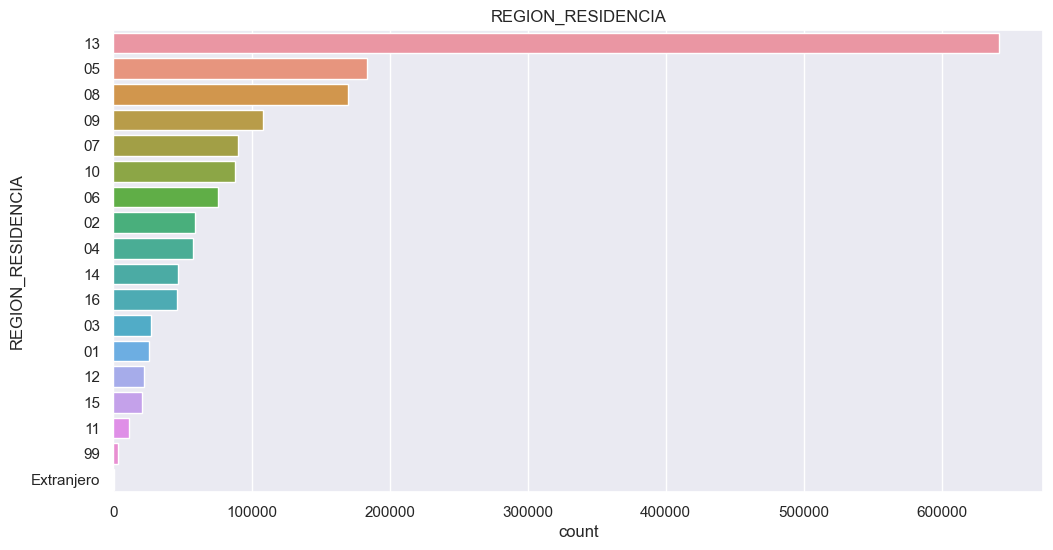

--------------------------------------------------------------

GLOSA_REGION_RESIDENCIA
Metropolitana de Santiago                  641495
De Valparaíso                              183477
Del Bíobío                                 170215
De La Araucanía                            108120
Del Maule                                   90242
De Los Lagos                                87897
Del Libertador B. O'Higgins                 75482
De Antofagasta                              59038
De Coquimbo                                 57418
De Los Ríos                                 46523
De Ñuble                                    45966
De Atacama                                  27287
De Tarapacá                                 25613
De Magallanes y de La Antártica Chilena     22066
De Arica y Parinacota                       20832
De Aisén del Gral. C. Ibáñez del Campo      11553
Ignorada                                     3410
Extranjero                                    302
Name: GLOSA_

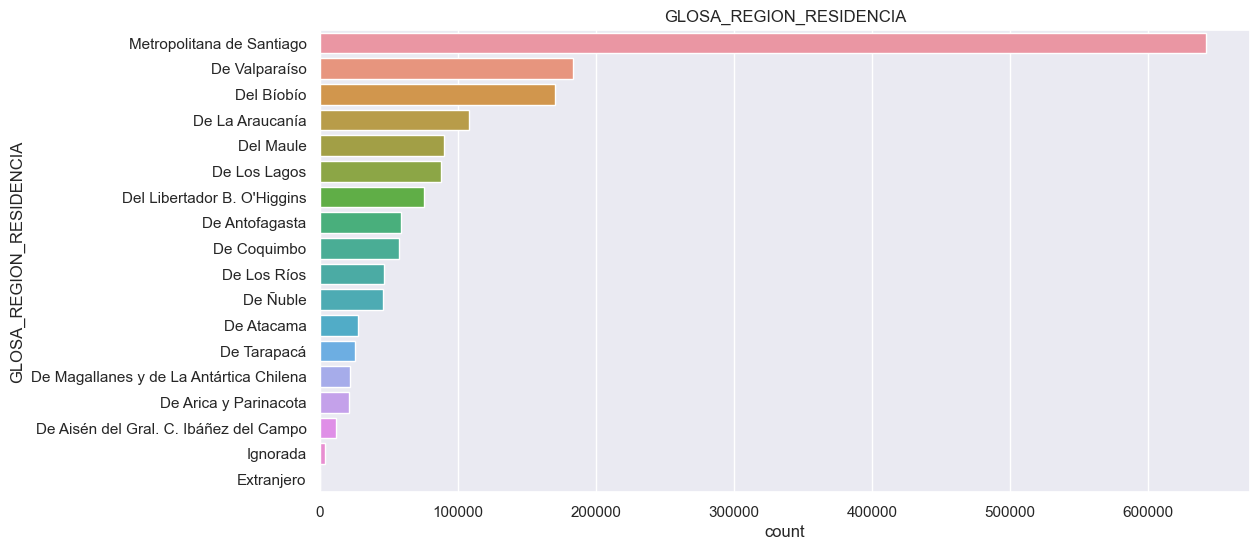

--------------------------------------------------------------

BENEFICIARIO
B    481694
A    353430
D    224790
C    148527
Name: BENEFICIARIO, dtype: int64


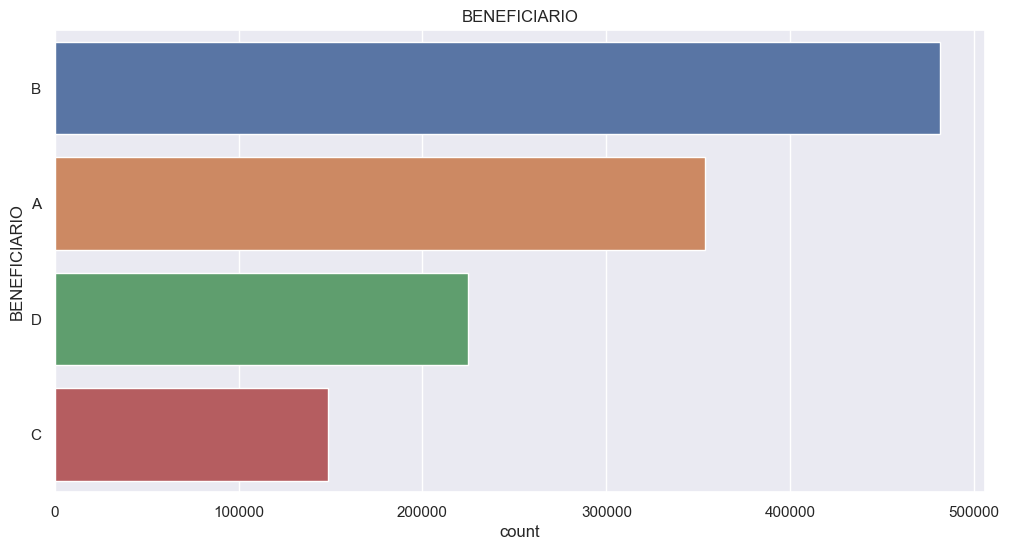

--------------------------------------------------------------

FECHA_EGRESO
2013-10-30    7185
2013-03-28    7125
2013-09-06    6805
2013-10-11    6798
2013-07-12    6765
              ... 
2013-09-21    1801
2013-11-03    1693
2013-09-22    1633
2013-12-25    1322
2013-01-01    1165
Name: FECHA_EGRESO, Length: 365, dtype: int64
--------------------------------------------------------------

DIAG1
O809    51852
O800    43017
O829    41582
J189    35760
O820    31252
        ...  
S452        1
E703        1
T404        1
T732        1
Z111        1
Name: DIAG1, Length: 7458, dtype: int64
--------------------------------------------------------------

GLOSA_DIAG1
PARTO UNICO ESPONTANEO, SIN OTRA ESPECIFICACION               51852
PARTO UNICO ESPONTANEO, PRESENTACION CEFALICA DE VERTICE      43017
PARTO POR CESAREA, SIN OTRA ESPECIFICACION                    41582
NEUMONIA, NO ESPECIFICADA                                     35760
PARTO POR CESAREA ELECTIVA                              

,cantidad_na,porcentaje_na
ID_PACIENTE,37026,2.21
ESTABLECIMIENTO_SALUD,0,0.00
GLOSA_ESTABLECIMIENTO_SALUD,0,0.00
PERTENENCIA_ESTABLECIMIENTO_SALUD,0,0.00
SEREMI,1084018,64.64
SERVICIO_DE_SALUD,592918,35.36
SEXO,0,0.00
FECHA_NACIMIENTO,156,0.01
EDAD_CANT,0,0.00
TIPO_EDAD,0,0.00


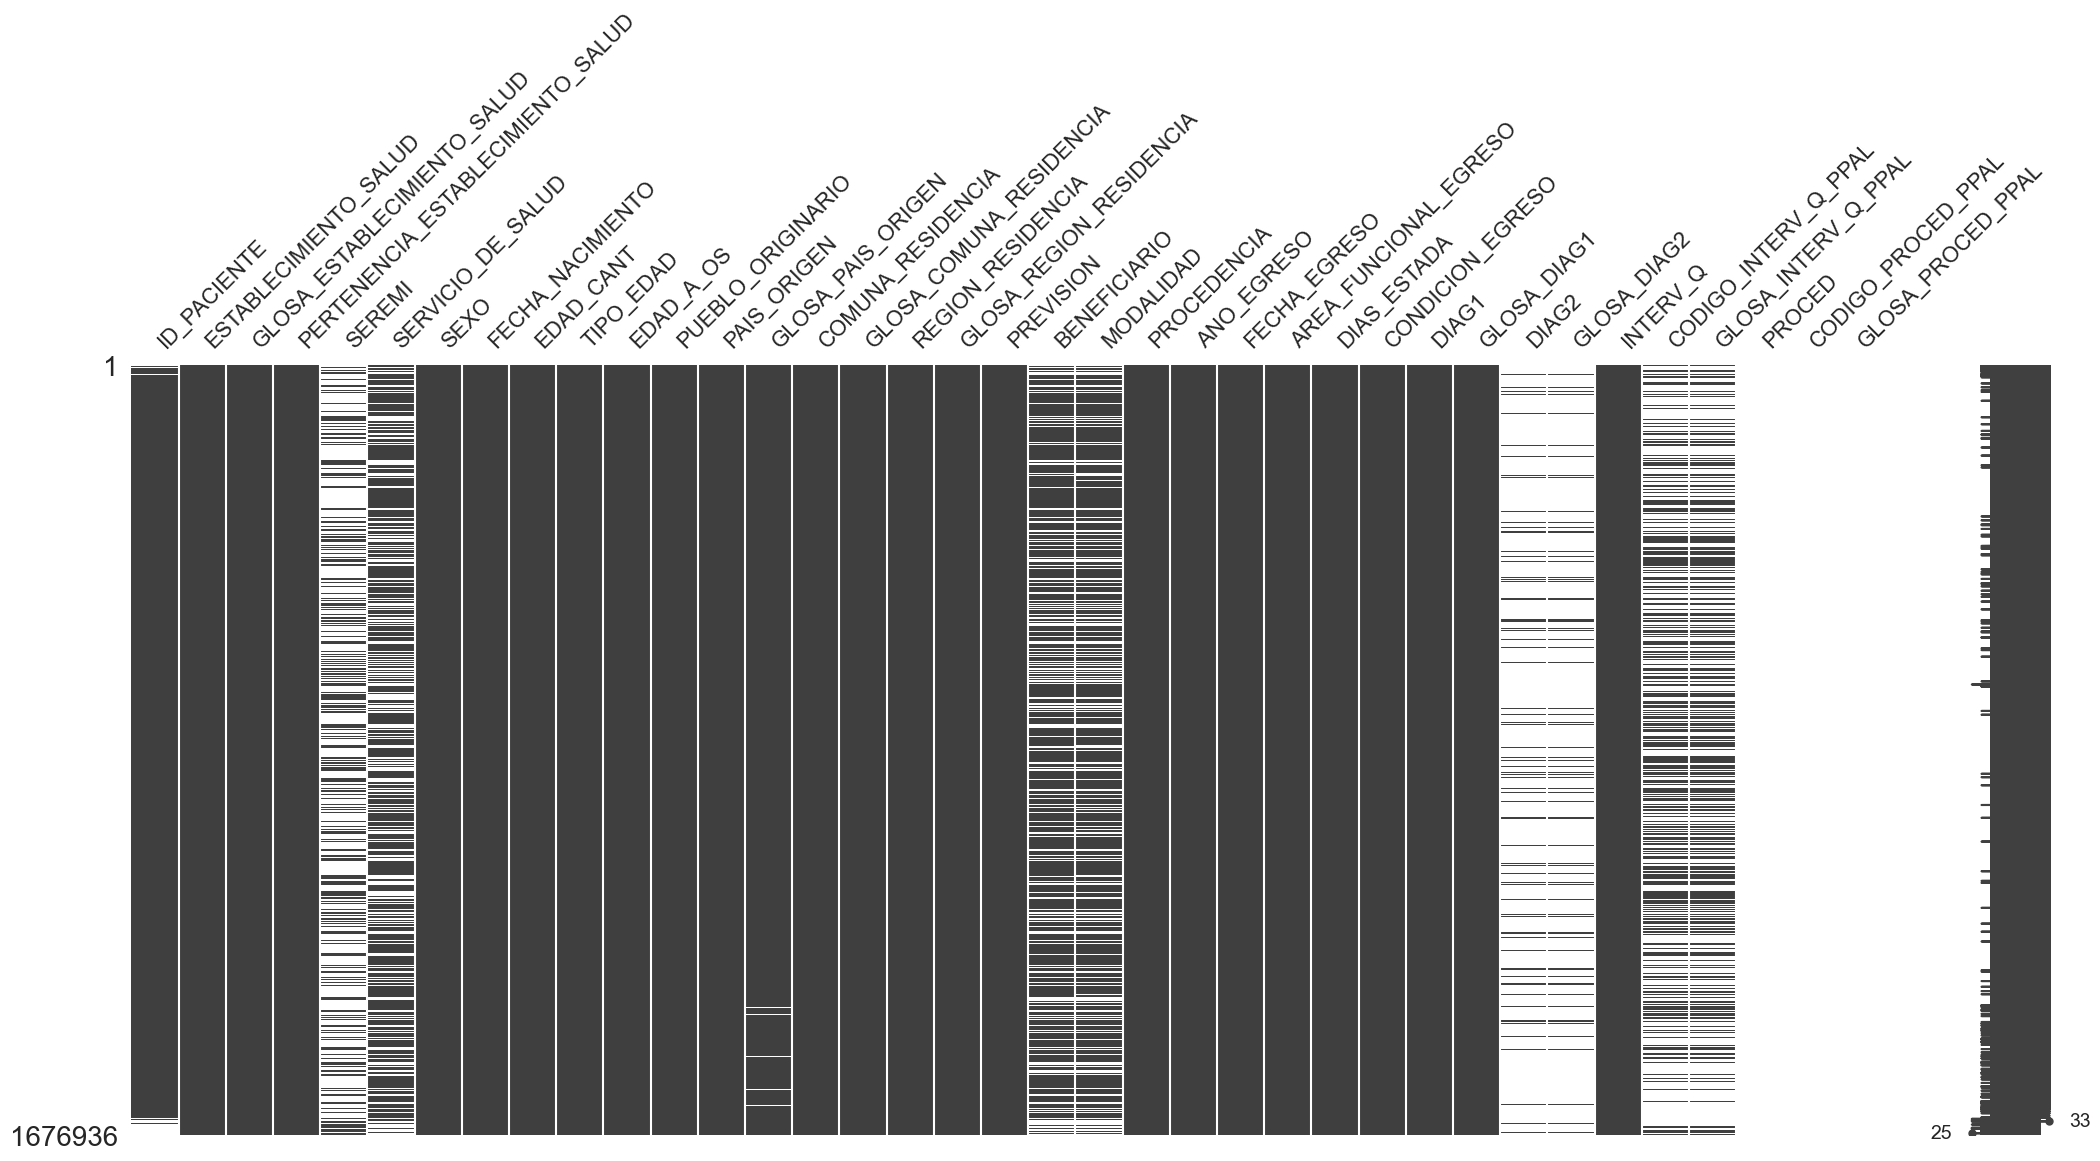

In [11]:
numericas, categoricas = aux2.separar_df_a_numericas_categoricas(dfs['2013'])
aux2.analizar_dist_todas_las_variables_categoricas(categoricas)
aux2.analizar_valores_faltantes(dfs['2013'])

# Analisis de Ranking del Torax

In [52]:
GLOSA_TORAX = 'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica'

In [5]:
ranking = aux.analizar_ranking_diagnosticos_hospital(dfs['2013'], GLOSA_TORAX)

In [6]:
with pd.ExcelWriter('ranking_torax.xlsx') as writer:
    for anio, df in dfs.items():
        ranking = aux.analizar_ranking_diagnosticos_hospital(df, GLOSA_TORAX)
        ranking.to_excel(writer, sheet_name=anio, index=False)

IndexError: At least one sheet must be visible

# Análisis a lo largo del tiempo

In [62]:
def analizar_cantdad_egresos(egresos_en_el_tiempo):
    display(egresos_en_el_tiempo.to_frame())
    display(egresos_en_el_tiempo.describe().to_frame())
    aux2.graficar_a_lo_largo_del_tiempo(egresos_en_el_tiempo.sort_index())
    aux2.graficar_distribucion_variable_numerica(egresos_en_el_tiempo.reset_index(drop=True), 
                                                'egresos')

In [57]:
df_completa = pd.concat(dfs.values())

KeyboardInterrupt: 

In [58]:
df_torax = df_completa.query('GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

In [59]:
cantidad_egresos_totales = df_completa.ANO_EGRESO.value_counts()
analizar_cantdad_egresos(cantidad_egresos_totales)

**De estos resultados se puede ver que la cantidad de Egresos a lo largo del país se mantiene constante
entre 2013 a 2019.**

- 2013 fue el año con la mayor cantidad de egresos, con **1.676.936 egresos**
- 2019 fue el año con la menor cantidad de egresos, con **1.636.508 egresos**

- La media de egresos fueron **1.655.524 egresos**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019. Por lo tanto, en años normales (sin pandemia), es esperable que se mantenga esta tendencia y cantidad de egresos hospitalarios. 
- Hay **ausencia de una tendencia a la baja o a la subida** de egresos hospitalarios.

,ANO_EGRESO
2018,5482
2019,5435
2017,4901
2016,4872
2015,4621
2013,4435
2014,4409


,ANO_EGRESO
count,7.000000
mean,4879.285714
std,439.294402
min,4409.000000
25%,4528.000000
50%,4872.000000
75%,5168.000000
max,5482.000000


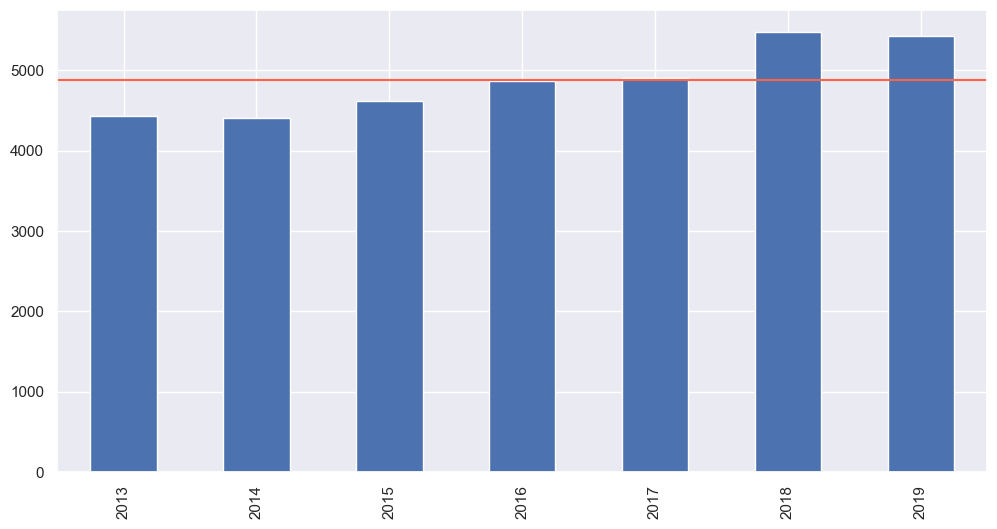

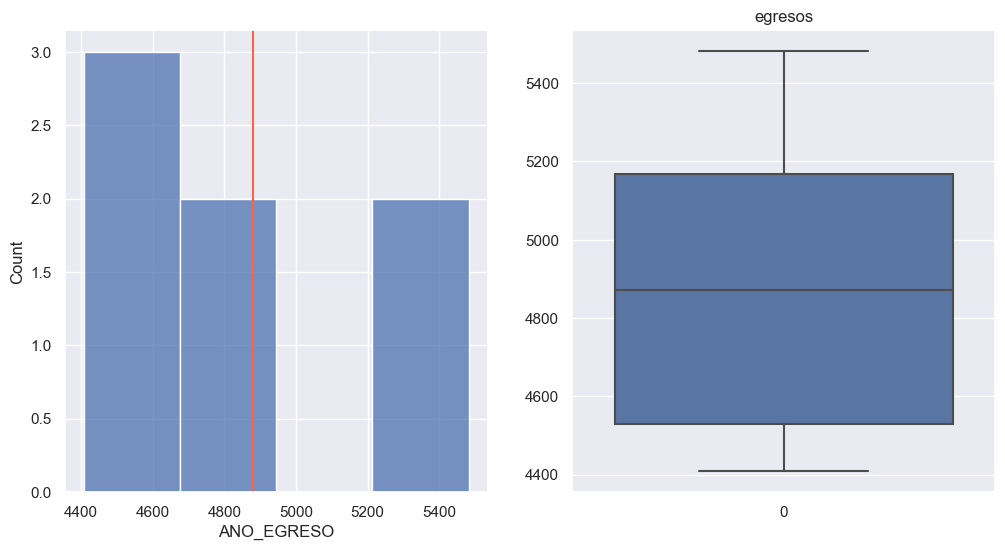

In [64]:
cantidad_egresos_torax = df_torax.ANO_EGRESO.value_counts()
analizar_cantdad_egresos(cantidad_egresos_torax)

**De estos resultados se puede ver que la cantidad de Egresos en el Tórax tiende al alza a lo largo
de los años**

- 2018 fue el año con la mayor cantidad de egresos, con **5482 egresos**
- 2019 fue el año con la menor cantidad de egresos, con **4409 egresos**

- La media de egresos fueron **4879**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019.